# Exploratory Data Analysis and Preprocessing

In [1]:
# Exploring Data 
# Preprocessing and Cleaning
# Handle Missing Value
# Handling Outlier
# Handling Skewness
# Handling Categorical Data
# Feature Engineering

# Prerequisite

In [2]:
# Numpy
# Pandas
# Matplotlib and Seaborn
# Descriptive Statistic

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Handling Missing Values

In [4]:
np.nan

nan

In [5]:
name = ['john','jack','jill','kenny','kevin']
math = [89,78,67,np.nan,85]
science = [78,75,np.nan,np.nan,76]

In [6]:
dic = {'name':name,'math':math,'science':science,}

In [7]:
df = pd.DataFrame(dic)

In [8]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


# Drop Null Values

In [9]:
df.isnull()

,name,math,science
0,False,False,False
1,False,False,False
2,False,False,True
3,False,True,True
4,False,False,False


In [10]:
df.isnull().sum()

name       0
math       1
science    2
dtype: int64

In [11]:
df.dropna()

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [12]:
df.dropna(axis=1)
#,inplace=True

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


In [13]:
df.drop(2)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [14]:
df.drop([2,3])

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
4,kevin,85.0,76.0


In [15]:
df.drop('math',axis=1)

,name,science
0,john,78.0
1,jack,75.0
2,jill,NaN
3,kenny,NaN
4,kevin,76.0


In [16]:
df.drop(['math','science'],axis=1)

,name
0,john
1,jack
2,jill
3,kenny
4,kevin


# Fill Null Values

In [17]:
df

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,NaN
3,kenny,NaN,NaN
4,kevin,85.0,76.0


In [18]:
df.fillna(0)

,name,math,science
0,john,89.0,78.0
1,jack,78.0,75.0
2,jill,67.0,0.0
3,kenny,0.0,0.0
4,kevin,85.0,76.0


In [19]:
math_mean = df['math'].mean()

In [20]:
science_mean = df['science'].mean()

In [21]:
df['math'].fillna(math_mean,inplace=True)
df['science'].fillna(science_mean,inplace=True)

In [22]:
df

,name,math,science
0,john,89.00,78.000000
1,jack,78.00,75.000000
2,jill,67.00,76.333333
3,kenny,79.75,76.333333
4,kevin,85.00,76.000000


# Cars Dataset

In [23]:
cars = pd.read_csv('cars.csv')

In [24]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [25]:
cars.isnull().sum()
# Detects only NaN

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
width                205 non-null float64
height               205 non-null float64
engine-type          205 non-null object
engine-size          205 non-null int64
horsepower           205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null int64
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [27]:
cars['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [28]:
cars['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
134     6
104     6
128     6
168     5
103     5
102     5
65      5
85      5
94      5
74      5
95      5
148     4
93      4
118     4
122     4
106     4
115     3
83      3
125     3
137     3
101     3
154     3
153     2
188     2
145     2
81      2
129     2
192     2
89      2
164     2
110     2
158     2
197     2
194     2
87      2
119     2
108     2
113     2
142     1
90      1
256     1
107     1
186     1
98      1
78      1
231     1
77      1
121     1
Name: normalized-losses, dtype: int64

In [29]:
cars['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
88      6
62      6
101     6
160     6
145     5
102     5
84      5
76      5
97      5
82      5
92      4
86      4
123     4
111     4
73      3
121     3
85      3
152     3
207     3
90      3
182     3
161     2
184     2
156     2
52      2
155     2
112     2
94      2
56      2
100     2
176     2
?       2
162     2
72      1
120     1
154     1
134     1
142     1
262     1
135     1
115     1
175     1
60      1
106     1
200     1
288     1
78      1
58      1
48      1
143     1
64      1
55      1
140     1
Name: horsepower, dtype: int64

In [30]:
cars['horsepower'].replace('?',np.nan,inplace=True)

In [31]:
cars['horsepower'] = cars['horsepower'].astype('float')

In [32]:
cars['horsepower'].fillna(cars['horsepower'].mean(),inplace=True)

In [33]:
cars['normalized-losses'].replace('?',np.nan,inplace=True)
cars['normalized-losses'] = cars['normalized-losses'].astype('float')
cars['normalized-losses'].fillna(cars['normalized-losses'].mean(),inplace=True)

# Remove Outliers

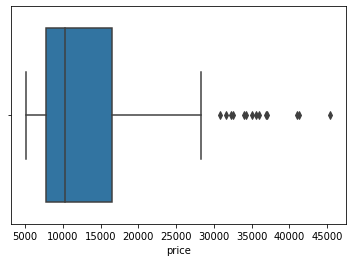

In [34]:
sns.boxplot(cars['price'])
plt.show()

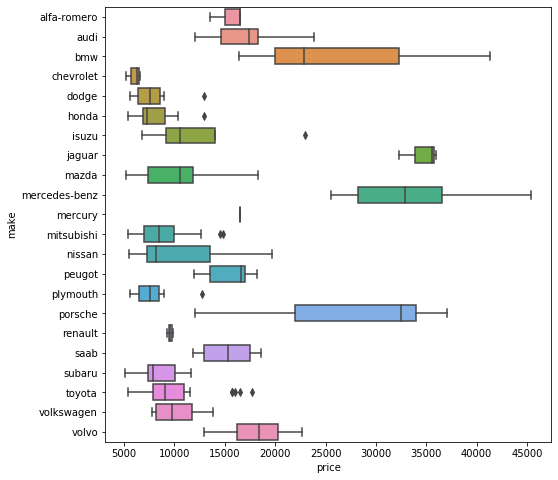

In [35]:
plt.figure(figsize=(8,8))
sns.boxplot(data=cars,y='make',x='price')
plt.show()

In [36]:
cars[(cars['make']=='isuzu') & (cars['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [37]:
cars.drop(45,inplace=True)

In [38]:
cars[(cars['make']=='plymouth') & (cars['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [39]:
cars.drop(124,inplace=True)

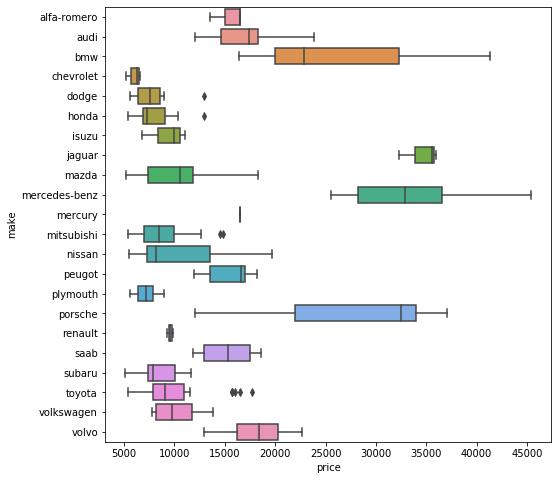

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(data=cars,y='make',x='price')
plt.show()

# Handling Categorical Data

In [41]:
# one hot encoding

In [42]:
cars_cat = cars.select_dtypes(object)

In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 15 columns):
symboling            203 non-null int64
normalized-losses    203 non-null float64
make                 203 non-null object
fuel-type            203 non-null object
body-style           203 non-null object
drive-wheels         203 non-null object
engine-location      203 non-null object
width                203 non-null float64
height               203 non-null float64
engine-type          203 non-null object
engine-size          203 non-null int64
horsepower           203 non-null float64
city-mpg             203 non-null int64
highway-mpg          203 non-null int64
price                203 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 35.4+ KB


In [44]:
cars_num = cars.select_dtypes(['int64','float64'])

In [45]:
cars_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [46]:
cars_cat['fuel-type'].value_counts()

gas       183
diesel     20
Name: fuel-type, dtype: int64

In [47]:
pd.get_dummies(cars_cat['fuel-type'])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [48]:
pd.get_dummies(cars_cat['make'])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
#label encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
le.fit_transform(cars_cat['fuel-type'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1])

In [53]:
le.fit_transform(cars_cat['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [54]:
le.fit_transform(cars_cat['body-style'])

array([0, 0, 2, 3, 3, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3,
       3, 4, 1, 3, 3, 0, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 2, 3, 4, 1, 2, 3, 3, 4, 3, 2, 2, 2, 3, 3, 4, 4,
       3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 3, 3, 4, 2, 1, 1, 0, 2, 4, 2, 2, 3,
       2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4,
       3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 2, 0, 3, 3, 2, 3, 2,
       2, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 3, 3, 3, 3])

In [55]:
for col in cars_cat:
    le = LabelEncoder()
    cars_cat[col] = le.fit_transform(cars_cat[col])

In [56]:
cars_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


# Skewness

In [57]:
cars_num.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [58]:
from scipy.stats import skew

symboling
0.20496147298318457


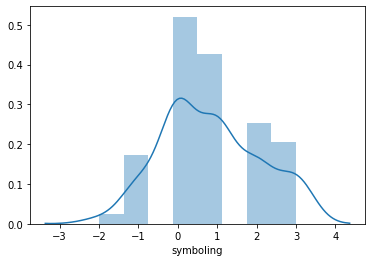

normalized-losses
0.8443855299694787


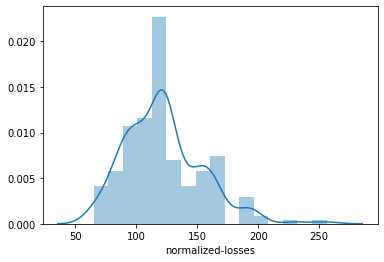

width
0.8937983893148324


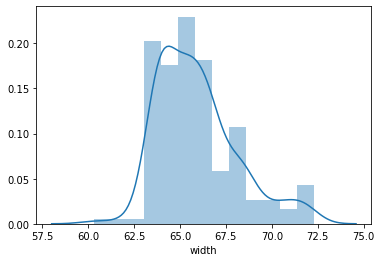

height
0.04840569764935829


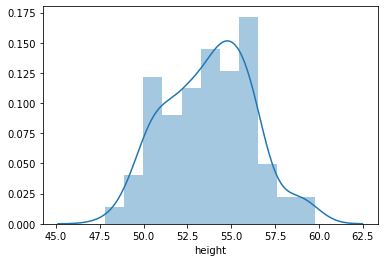

engine-size
1.9410595463554827


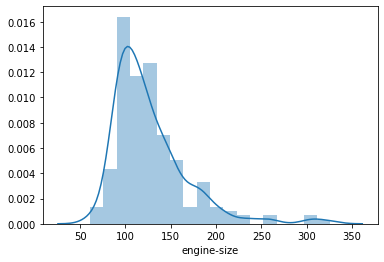

horsepower
1.3995855878312282


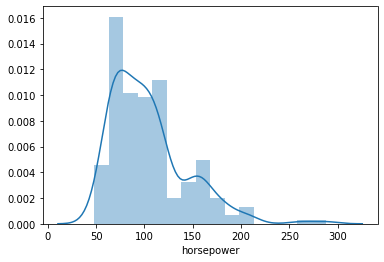

city-mpg
0.6606215321859762


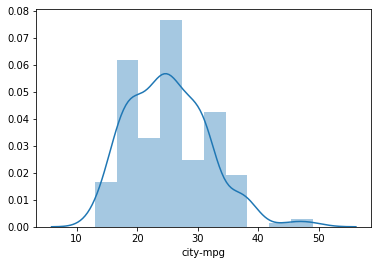

highway-mpg
0.5382939311121927


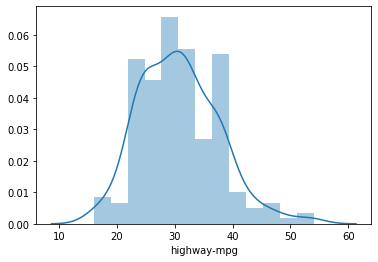

price
1.8116320727324626


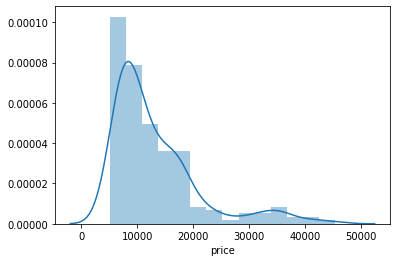

In [59]:
for col in cars_num:
    print(col)
    print(skew(cars_num[col]))
    
    plt.figure()
    sns.distplot(cars_num[col])
    plt.show()

In [60]:
cars_num.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.469208,-0.240749,-0.539038,-0.116004,0.060534,-0.021767,0.049711,-0.082264
normalized-losses,0.469208,1.000000,0.084442,-0.373093,0.111345,0.204345,-0.221327,-0.180052,0.133931
width,-0.240749,0.084442,1.000000,0.279335,0.734574,0.641435,-0.640851,-0.675776,0.729743
height,-0.539038,-0.373093,0.279335,1.000000,0.069675,-0.106996,-0.049439,-0.109908,0.137769
engine-size,-0.116004,0.111345,0.734574,0.069675,1.000000,0.809545,-0.651513,-0.675339,0.864535
horsepower,0.060534,0.204345,0.641435,-0.106996,0.809545,1.000000,-0.802951,-0.769615,0.758369
city-mpg,-0.021767,-0.221327,-0.640851,-0.049439,-0.651513,-0.802951,1.000000,0.970782,-0.677174
highway-mpg,0.049711,-0.180052,-0.675776,-0.109908,-0.675339,-0.769615,0.970782,1.000000,-0.699871
price,-0.082264,0.133931,0.729743,0.137769,0.864535,0.758369,-0.677174,-0.699871,1.000000


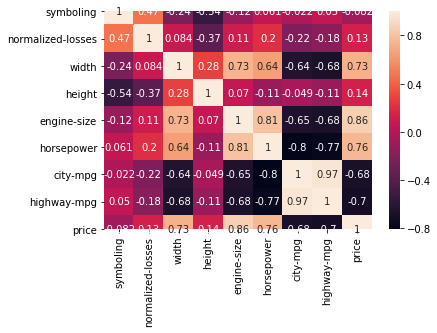

In [61]:
sns.heatmap(cars_num.corr(),annot=True)
plt.show()

In [62]:
cars_num['normalized-losses'] = np.sqrt(cars_num['normalized-losses'])

In [63]:
skew(cars_num['normalized-losses'])

0.42362644855543496

In [64]:
np.sqrt(-1)

nan

In [65]:
np.log(-1)

nan

In [66]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [67]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


# Scalling

In [68]:
n1 = 1000 #m
n2 = 20 #km

n2 > n1

False

In [69]:
# MinMaxScaler

In [70]:
# x_new = (x_old - min) / (max - min)

In [71]:
a = np.array([10,20,30,40,50])
b = np.array([100,200,300,400,500])

In [72]:
def minmax(ar):
    ar_new = (ar - ar.min())/(ar.max() - ar.min())
    return ar_new

In [73]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [74]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
mx = MinMaxScaler()

In [77]:
mx.fit_transform(cars_new)

array([[1.        , 0.37581256, 0.31666667, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.37581256, 0.31666667, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.37581256, 0.43333333, ..., 1.        , 0.        ,
        0.83333333],
       ...,
       [0.2       , 0.21221861, 0.71666667, ..., 1.        , 0.        ,
        0.83333333],
       [0.2       , 0.21221861, 0.71666667, ..., 1.        , 0.        ,
        0.5       ],
       [0.2       , 0.21221861, 0.71666667, ..., 1.        , 0.        ,
        0.5       ]])

In [78]:
for col in cars_new:
    mx = MinMaxScaler()
    cars_new[col] = mx.fit_transform(cars_new[col])

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.  3.  1.  2.  2.  2.  1.  1.  1.  0.  2.  0.  0.  0.  1.  0.  0.  0.
  2.  1.  0.  1.  1.  1.  1.  1.  1.  1. -1.  3.  2.  2.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  1.  2.  0.  0.  0.  1.  1.  1.  1.  1.
  3.  3.  3.  3.  1.  0.  1.  0.  0.  0.  0.  0. -1. -1.  0. -1. -1.  3.
  0.  1.  1.  2.  2.  2.  1.  3.  3.  3.  3.  3.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  0.  0.  0.  0.  0.  3.  3.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1.  3.  3.  3.
  3.  1.  0.  2.  3.  2.  3.  2.  3.  2.  2.  2.  2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  2.  2.  2.  2.  2.  2. -1. -1. -1. -1. -1.  3.  3. -1. -1.
  2.  2.  2.  2.  2.  2.  2.  3.  3.  0.  0.  0. -2. -1. -2. -1. -2. -1.
 -1. -1. -1. -1. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# for col in cars_new:
#     mx = MinMaxScaler()
#     cars_new[col] = mx.fit_transform(cars_new[[col]])

In [ ]:
cars_new.head()

In [ ]:
# Standard Scaler

<p> Standardization </p>

z = (x - mean)/standard deviation

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
for col in cars_new:
    mx = StandardScaler()
    cars_new[col] = mx.fit_transform(cars_new[[col]])

In [81]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.755232,0.063868,-0.847525,-2.034109,0.073392,0.171801,-0.645988,-0.545008,0.039708,-1.947232,0.33059,-3.042693,1.215870,-0.122474,-2.851234
1,1.755232,0.063868,-0.847525,-2.034109,0.073392,0.171801,-0.645988,-0.545008,0.420466,-1.947232,0.33059,-3.042693,1.215870,-0.122474,-2.851234
2,0.139304,0.063868,-0.194593,-0.554978,0.602053,1.262069,-0.954543,-0.691353,0.420466,-1.947232,0.33059,-0.716265,1.215870,-0.122474,1.877528
3,0.947268,1.317023,0.131873,0.225675,-0.431238,-0.056395,-0.183157,-0.105974,0.097360,-1.787842,0.33059,0.446949,-0.585748,-0.122474,-0.013977
4,0.947268,1.317023,0.225149,0.225675,0.217572,0.273221,-1.108820,-1.276731,0.540839,-1.787842,0.33059,0.446949,-2.387365,-0.122474,-0.013977


# Feature Engineering

In [82]:
cars_new['area'] = cars_new['height'] * cars_new['width']

In [83]:
cars_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,area
0,1.755232,0.063868,-0.847525,-2.034109,0.073392,0.171801,-0.645988,-0.545008,0.039708,-1.947232,0.33059,-3.042693,1.215870,-0.122474,-2.851234,1.723958
1,1.755232,0.063868,-0.847525,-2.034109,0.073392,0.171801,-0.645988,-0.545008,0.420466,-1.947232,0.33059,-3.042693,1.215870,-0.122474,-2.851234,1.723958
2,0.139304,0.063868,-0.194593,-0.554978,0.602053,1.262069,-0.954543,-0.691353,0.420466,-1.947232,0.33059,-0.716265,1.215870,-0.122474,1.877528,0.107995
3,0.947268,1.317023,0.131873,0.225675,-0.431238,-0.056395,-0.183157,-0.105974,0.097360,-1.787842,0.33059,0.446949,-0.585748,-0.122474,-0.013977,0.029760
4,0.947268,1.317023,0.225149,0.225675,0.217572,0.273221,-1.108820,-1.276731,0.540839,-1.787842,0.33059,0.446949,-2.387365,-0.122474,-0.013977,0.050810
